# Homework 3
## Data Preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from datetime import datetime, date

## load googleplaystore and googleplaystore_user_reviews dataset from csv
concreteDataset = pd.read_csv('./Concrete_Data.csv', names=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength'], skiprows=1)

## check with the data reading
#concreteDataset.drop_duplicates(subset=['Cement'], keep='first', inplace=True)
print(concreteDataset.shape)
concreteDataset.head()
# print(concreteDataset['Fine Aggregate'])

(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<Figure size 432x288 with 0 Axes>

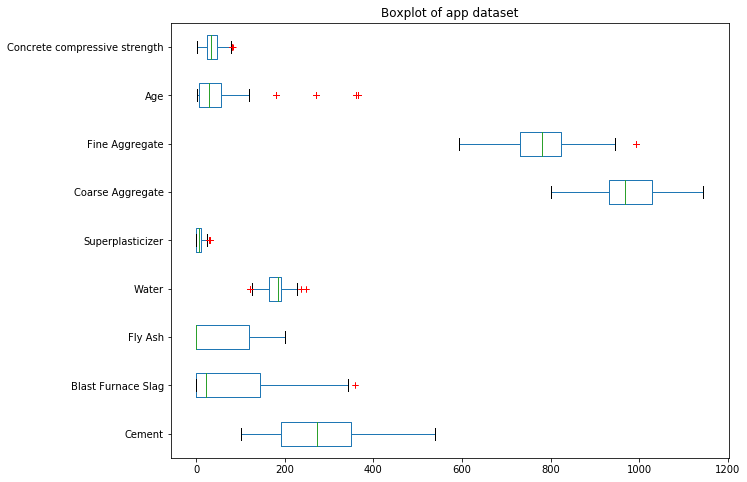

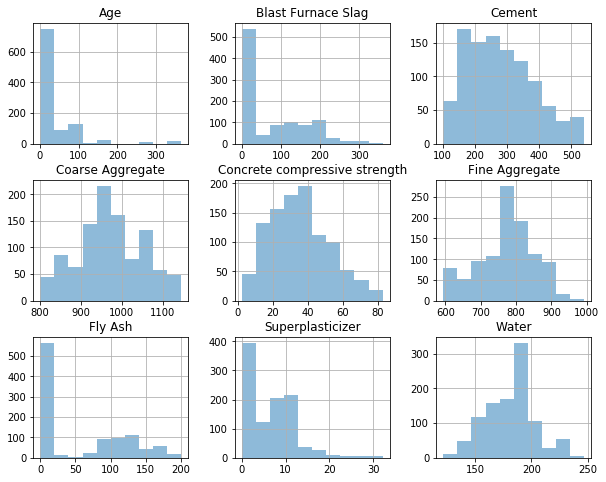

In [5]:
import matplotlib.pyplot as plt
plt.figure();
## plot the Box
concreteDataset.plot.box(sym='r+', title='Boxplot of app dataset', figsize=(10, 8), vert=False)
## plot the histogram
concreteDataset.hist(alpha=0.5, figsize=(10, 8)) #, title='Histogram of app dataset'
plt.draw_all()

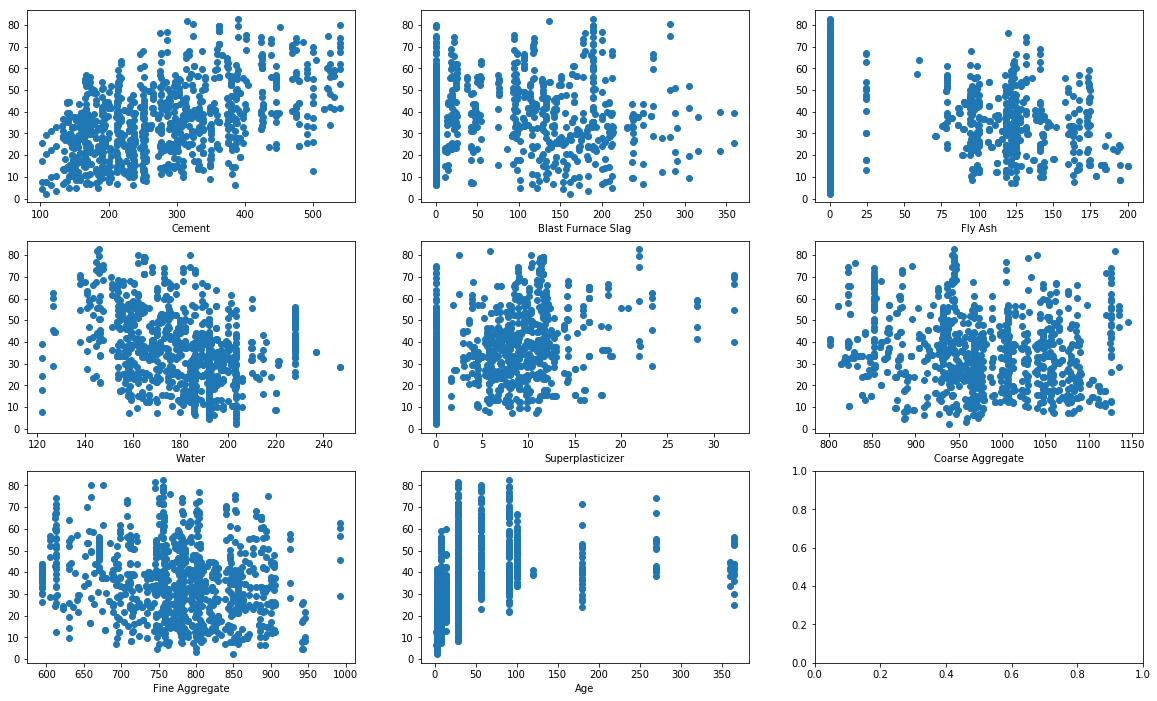

In [6]:
import matplotlib.pyplot as plt

x_vars = [
'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age'
]

_, subplot_arr = plt.subplots(3, 3, figsize=(20, 12))
for idx, x_var in enumerate(x_vars):
  x_idx = idx // 3
  y_idx = idx % 3
  subplot_arr[x_idx, y_idx].scatter(concreteDataset[x_var], concreteDataset['Concrete compressive strength'])
  subplot_arr[x_idx, y_idx].set_xlabel(x_var)

plt.show()

## 1. Linear regression with single variable by via Scikit-learn

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

numInstances = len(concreteDataset)
X = concreteDataset['Cement'].values.reshape((numInstances, 1)) ##[:, np.newaxis]
Y = concreteDataset['Concrete compressive strength'].values

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=0)
print('#Training data points: %d' % xTrain.shape[0])
print('#Testing data points: %d' % xTest.shape[0])

# Training
reg = LinearRegression()
reg.fit(xTrain, yTrain)

# Testing
yTrainPredict = reg.predict(xTrain)
yTestPredict = reg.predict(xTest)

print('Slope (w_1): %.2f' % reg.coef_[0])
print('Intercept/bias (w_0): %.2f' % reg.intercept_)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(yTrain, yTrainPredict),
       mean_squared_error(yTest, yTestPredict)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(yTrain, yTrainPredict),
                                       r2_score(yTest, yTestPredict)))

# # Calculating RMSE and R2 Score
# mse = mean_squared_error(Y, Y_pired)
# rmse = np.sqrt(mse)
# r2_score = reg.score(X, Y)

# print('RMSE %f' % np.sqrt(mse))
# print('r2_score : %f' % r2_score)

#Training data points: 824
#Testing data points: 206
Slope (w_1): 0.08
Intercept/bias (w_0): 14.66
MSE train: 217.84, test: 178.51
R^2 train: 0.23, test: 0.32


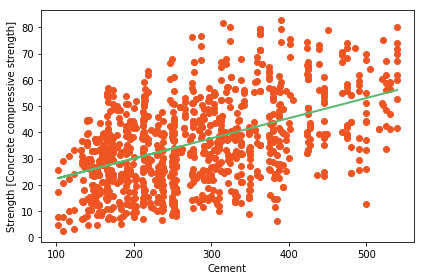

In [134]:
# Visualize the regression line and data scatter plot.
def lin_regplot(x, y, model):
  plt.scatter(x, y, c='#ef5423')
  plt.plot(x, model.predict(x), color='#58b970', linewidth=2)
  return 

lin_regplot(X, Y, reg)
plt.xlabel('Cement')
plt.ylabel('Strength [Concrete compressive strength]')
plt.tight_layout()
plt.show()

## 2. Linear regression with single variable by your own gradient descent

In [135]:
class LinearRegressionGradientDescent(object):
    def __init__(self, learningRate=0.00000001, numInterations=5000, randomState=1, updateOption=0): #If updateOption=1, update one w once
        self.learningRate = learningRate
        self.numInterations = numInterations
        self.randomState = randomState
        self.updateOption = updateOption

    def fit(self, x, y):
        rgen = np.random.RandomState(self.randomState)
        self.theta_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.numInstances_ = x.shape[0]
        self.cost_ = []
        if self.updateOption == 0:
            for i in range(self.numInterations):
                prediction = self.network(x)
                errors = prediction - y
                # Cost function
                cost = (errors**2).sum() / 2
                self.cost_.append(cost)
                # Update the theta
                self.theta_[1:] -= self.learningRate * (x.T.dot(errors) / self.numInstances_)
                self.theta_[0] -= self.learningRate * (errors.sum() / self.numInstances_)
                #print(self.theta_)
            return self
        else:
            for i in range(self.numInterations):
                prediction = self.network(x)
                errors = prediction - y
                # Cost function
                cost = (errors**2).sum() / 2
                self.cost_.append(cost)
                # Update the theta
                idx = i % (len(self.theta_) - 1)
                if idx == 0: self.theta_[0] -= self.learningRate * (errors.sum() / self.numInstances_)
                else: self.theta_[idx] -= self.learningRate * (x.T.dot(errors)[idx] / self.numInstances_)
                #print(self.theta_)
            return self

    def network(self, x):
        return np.dot(x, self.theta_[1:]) + self.theta_[0]

    def predict(self, x):
        return self.network(x)

## Use same Training Testing Data Instance
print('#Training data points: %d' % xTrain.shape[0])
print('#Testing data points: %d' % xTest.shape[0])

reg = LinearRegressionGradientDescent()
reg.fit(xTrain, yTrain)

# Testing
yTrainPredict = reg.predict(xTrain)
yTestPredict = reg.predict(xTest)

print('Slope (w_1): %.2f' % reg.theta_[1])
print('Intercept/bias (w_0): %.2f' % reg.theta_[0])
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(yTrain, yTrainPredict),
       mean_squared_error(yTest, yTestPredict)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(yTrain, yTrainPredict),
                                       r2_score(yTest, yTestPredict)))
print(reg.cost_[-1:])

#Training data points: 824
#Testing data points: 206
Slope (w_1): 0.12
Intercept/bias (w_0): 0.02
MSE train: 244.43, test: 180.20
R^2 train: 0.13, test: 0.32
[100703.29458585984]


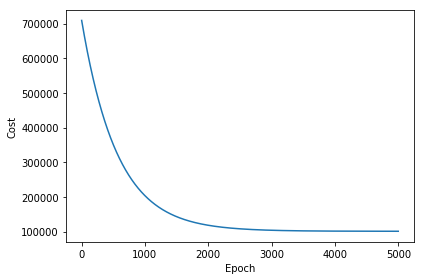

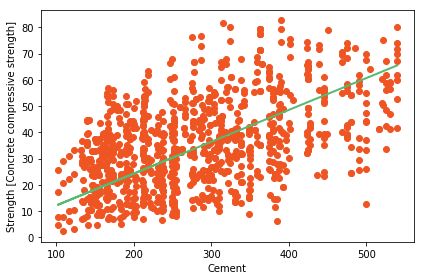

In [136]:
## Visualice Cost
plt.plot(range(1, reg.numInterations + 1), reg.cost_)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

# Visualize the regression line and data scatter plot.
lin_regplot(X, Y, reg)
plt.xlabel('Cement')
plt.ylabel('Strength [Concrete compressive strength]')
plt.tight_layout()
plt.show()

## 3. Linear regression with multi-variable by your own gradient descent

#Training data points: 721
#Testing data points: 309
[ 35.61282183   7.26046311   4.00722921   0.71873043  -5.43547091
   3.356733    -1.35571571  -2.64295351   6.75328404]
MSE train: 118.70, test: 97.54
R^2 train: 0.59, test: 0.62


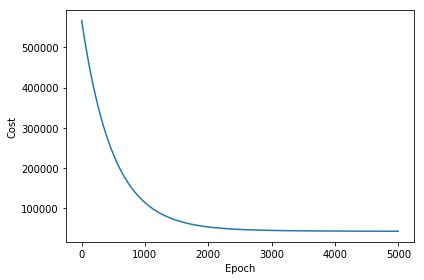

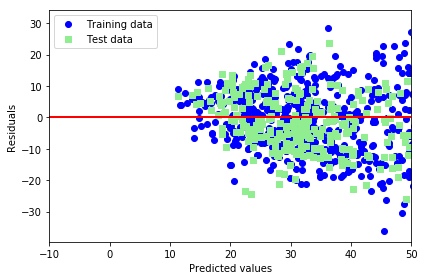

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

X = concreteDataset.iloc[:, :-1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

y_train_std = preprocessing.scale(y_train)
y_test_std = preprocessing.scale(y_test)

# Training
reg = LinearRegressionGradientDescent(0.001, 5000, 1, 0)
reg.fit(X_train_std, y_train)
print(reg.theta_)

# Testing
y_train_pred = reg.predict(X_train_std)
y_test_pred = reg.predict(X_test_std)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

plt.plot(range(1, reg.numInterations + 1), reg.cost_)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

[  1.66718863e+01   1.25068333e+00   6.51431140e-01  -4.81258255e+00
   5.34240156e+00  -7.73668072e-01  -1.85592571e+00   2.87527470e+00
   3.19039096e-03]
MSE train: 759.91, test: 729.54
R^2 train: -1.64, test: -1.84


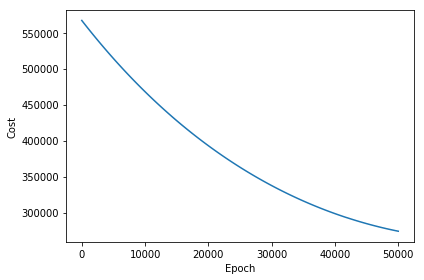

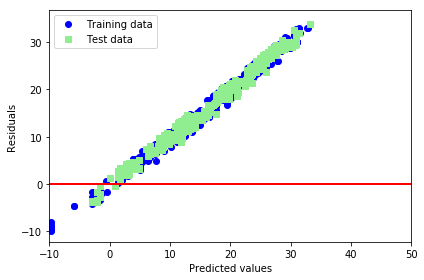

In [138]:
# Training

reg = LinearRegressionGradientDescent(0.0001, 50000, 1, 1)
reg.fit(X_train_std, y_train)
print(reg.theta_)

# Testing

y_train_pred = reg.predict(X_train_std)
y_test_pred = reg.predict(X_test_std)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

plt.plot(range(1, reg.numInterations + 1), reg.cost_)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

plt.scatter(
    y_train_pred,
    y_train_pred - y_train_std,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test_std,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

## 4. Polynomial regression by your own gradient descent

quadratic:
theta:
[ 15.14328112  15.1209201    6.8828609    2.96402888  -1.06976329
  -4.55922776   3.97125847  -1.27273372  -1.41296097  11.41738872
   1.32526627  -0.38093491   0.0929233   -3.02711471   0.71821474
  -0.51422147  -0.6488389   -0.30802126   1.3018309   -0.50302263
  -1.9097007    1.84903809  -1.23188158   0.07662032   0.61467361
   2.06215859  -0.53384286   0.96364927   0.69951157   2.1163438
   0.04281719   0.90605413  -1.96692302   0.08080534  -0.38957474
  -0.77500075  -2.87574065   1.02692736  -0.32051803   0.49310638
   1.98443161   1.93594264   1.03591704  -0.27542832   0.48368081
  -1.4801989 ]
MSE train: 81.81, test: 90.11
R^2 train: 0.71, test: 0.66


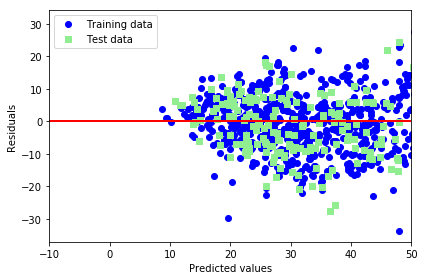

cubic:
theta:
[  1.16522352e+01   1.16298742e+01   1.22181304e+00   1.75371313e+00
   7.65242991e-01  -1.92865829e+00   2.09380831e+00  -5.79133060e-01
  -1.20035253e+00   4.06979555e+00   1.98678132e+00  -8.83561930e-01
  -1.85179705e+00  -1.03308756e+00   6.10318812e-01  -7.73328525e-01
   4.91522158e-01  -1.43155129e-01   4.00879905e+00  -2.07282052e+00
  -1.17017511e+00   2.40983659e-01  -1.16650951e+00  -3.94310692e-01
   8.71253860e-01   6.19584966e+00   1.27578770e-01   3.41077590e-01
   2.74530401e-01   2.72922369e-01  -3.51074095e-01   2.03182939e+00
  -1.97825200e+00  -5.23401909e-01  -3.21007952e-01  -8.47366705e-01
   6.84484144e-02   7.59483933e-01   3.46470270e-01  -8.73843314e-01
   3.17878968e+00   8.79010297e-01   5.61265333e-01  -1.99704803e-01
   1.77825322e+00  -2.39849981e+00   5.07706172e-01   1.50128855e+00
  -6.50410314e-01  -6.60862357e-01  -2.81192635e-01   2.30431177e-01
   4.59899560e-01   1.31878146e+00   2.54660318e+00  -2.17505088e+00
   3.81939334e-01  -

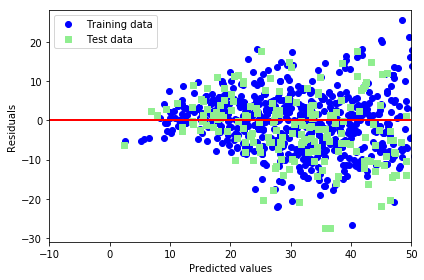

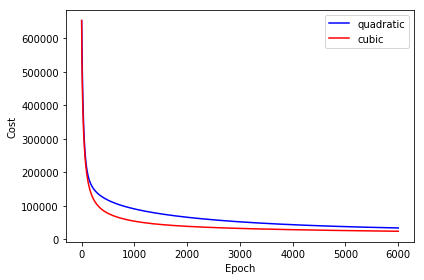

In [139]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

quadratic = PolynomialFeatures(2)
X_train_quad = quadratic.fit_transform(X_train_std)
X_test_quad = quadratic.fit_transform(X_test_std)

cubic = PolynomialFeatures(3)
X_train_cubic = cubic.fit_transform(X_train_std)
X_test_cubic = cubic.fit_transform(X_test_std)

# Training
reg_quad = LinearRegressionGradientDescent(learningRate=0.001, numInterations=6000)
reg_quad.fit(X_train_quad, y_train)

reg_cubic = LinearRegressionGradientDescent(learningRate=0.001, numInterations=6000)
reg_cubic.fit(X_train_cubic, y_train)

# Testing
y_train_pred_quad = reg_quad.predict(X_train_quad)
y_test_pred_quad = reg_quad.predict(X_test_quad)

y_train_pred_cubic = reg_cubic.predict(X_train_cubic)
y_test_pred_cubic = reg_cubic.predict(X_test_cubic)

print('quadratic:')
print('theta:')
print(reg_quad.theta_)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred_quad),
       mean_squared_error(y_test, y_test_pred_quad)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred_quad),
                                       r2_score(y_test, y_test_pred_quad)))

plt.scatter(
    y_train_pred_quad,
    y_train_pred_quad - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred_quad,
    y_test_pred_quad - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

print('cubic:')
print('theta:')
print(reg_cubic.theta_)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred_cubic),
       mean_squared_error(y_test, y_test_pred_cubic)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred_cubic),
                                       r2_score(y_test, y_test_pred_cubic)))

plt.scatter(
    y_train_pred_cubic,
    y_train_pred_cubic - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred_cubic,
    y_test_pred_cubic - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

plt.plot(range(1, reg_quad.numInterations + 1), reg_quad.cost_, color='blue', label='quadratic')
plt.plot(range(1, reg_cubic.numInterations + 1), reg_cubic.cost_, color='red', label='cubic')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



## 5. (Bonus) Making different regression model to make the r2_score > 0.87

[[  480.      0.      0.  ...,   936.    721.     28. ]
 [  375.      0.      0.  ...,  1038.    758.     28. ]
 [  303.6   139.9     0.  ...,   895.5   722.5    28. ]
 ..., 
 [  144.      0.    175.  ...,   943.    844.     28. ]
 [  239.6   359.4     0.  ...,   941.6   664.3    28. ]
 [  192.    288.      0.  ...,   929.8   716.1    90. ]]
theta:
[  1.78381677e+01   1.78446839e+01   4.12257948e+00   3.39524161e+00
   1.29391646e+00  -5.24459297e+00   2.65051979e+00  -1.13062420e+00
  -2.55221446e+00   1.13877972e+01  -1.33219183e+00  -4.46578158e-01
  -1.13142453e+00  -1.05385881e+00   8.90695455e-01   4.43755744e-01
   6.41712951e-01   1.20153169e+00   1.34368948e+00  -1.10597872e+00
  -8.07479630e-01   2.62973693e-01  -3.36846341e-01  -2.54752115e-01
   1.52303704e+00   7.49980235e+00   7.64295319e-02   6.72657803e-01
  -4.60997329e-01   2.28353665e-01   3.59184513e-01   4.48536216e-01
  -2.43906406e+00  -1.32849162e+00  -1.95202119e-01  -2.09671108e+00
  -3.16708877e+00   2.184311

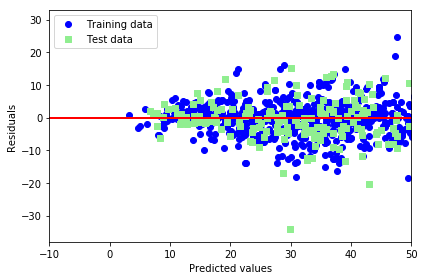

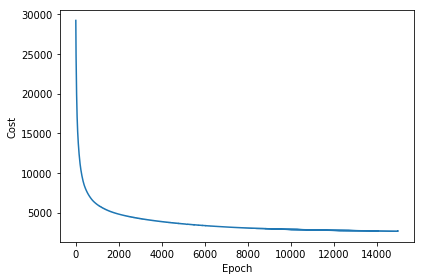

In [143]:
class LinearRegressionGradientDescentWithLogCosh(object):
    def __init__(self, learningRate=0.00000001, numInterations=5000, randomState=15):
        self.learningRate = learningRate
        self.numInterations = numInterations
        self.randomState = randomState

    def fit(self, x, y):
        rgen = np.random.RandomState(self.randomState)
        self.theta_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.numInstances_ = x.shape[0]
        self.cost_ = []
        for i in range(self.numInterations):
            prediction = self.network(x)
            errors = prediction - y
            # Cost function
            cost = np.log(np.cosh(errors)).sum()
            self.cost_.append(cost)
            # Update the theta
            errors_sinh = np.sinh(errors)
            errors_cosh = np.cosh(errors)
            errors_tmp = np.true_divide(errors_sinh, errors_cosh)
            self.theta_[1:] -= self.learningRate * x.T.dot(errors_tmp)
            self.theta_[0] -= self.learningRate * errors_tmp.sum()
            
        return self
    
    def network(self, x):
        return np.dot(x, self.theta_[1:]) + self.theta_[0]

    def predict(self, x):
        return self.network(x)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train)

cubic = PolynomialFeatures(3)
X_train_cubic = cubic.fit_transform(X_train_std)
X_test_cubic = cubic.fit_transform(X_test_std)

# Training
reg_cubic = LinearRegressionGradientDescentWithLogCosh(learningRate=0.00003, numInterations=15000)
reg_cubic.fit(X_train_cubic, y_train)

# Testing
y_train_pred_cubic = reg_cubic.predict(X_train_cubic)
y_test_pred_cubic = reg_cubic.predict(X_test_cubic)

print('theta:')
print(reg_cubic.theta_)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred_cubic),
       mean_squared_error(y_test, y_test_pred_cubic)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred_cubic),
                                       r2_score(y_test, y_test_pred_cubic)))

plt.scatter(
    y_train_pred_cubic,
    y_train_pred_cubic - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred_cubic,
    y_test_pred_cubic - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

plt.plot(range(1, reg_cubic.numInterations + 1), reg_cubic.cost_)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()
